- Text 빈도 분석 (분석용 패키지: matplotlib / wordcloud)
- nltk(자연어처리 PKG)

In [69]:
!pip install wordcloud
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user9\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import pandas as pd
import glob # 경로/이름 지정 파일 불러오기
import re # 메타 문자로 규칙 작성
from functools import reduce # 2차원 리스트 -> 1차원 리스트
from nltk.tokenize import word_tokenize #  단어 토큰화
from nltk.corpus import stopwords # 불용어 정보제공
from nltk.stem import WordNetLemmatizer # 표제어추출
from collections import Counter
import matplotlib.pyplot as plt 
from wordcloud import STOPWORDS,WordCloud

In [4]:
all_files = glob.glob('C:/kyj/python/BigDataAnalysis/data/myCabinetExcelData*.xls')
all_files

['C:/kyj/python/BigDataAnalysis/data\\myCabinetExcelData (1).xls',
 'C:/kyj/python/BigDataAnalysis/data\\myCabinetExcelData (2).xls',
 'C:/kyj/python/BigDataAnalysis/data\\myCabinetExcelData (3).xls',
 'C:/kyj/python/BigDataAnalysis/data\\myCabinetExcelData (4).xls',
 'C:/kyj/python/BigDataAnalysis/data\\myCabinetExcelData (5).xls',
 'C:/kyj/python/BigDataAnalysis/data\\myCabinetExcelData (6).xls',
 'C:/kyj/python/BigDataAnalysis/data\\myCabinetExcelData (7).xls',
 'C:/kyj/python/BigDataAnalysis/data\\myCabinetExcelData (8).xls',
 'C:/kyj/python/BigDataAnalysis/data\\myCabinetExcelData (9).xls',
 'C:/kyj/python/BigDataAnalysis/data\\myCabinetExcelData.xls']

In [5]:
all_file_data = []
for file in all_files:
    data_frame = pd.read_excel(file)
    all_file_data.append(data_frame)
all_file_data[0]    

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
95,NaN,96,Smart city big data analytics: An advanced review,"Soomro, Kamran; Bhutta, Muhammad Nasir Mumtaz;...",John Wiley & Sons Ltd,2019
96,NaN,97,A watchdog approach - name-matching algorithm ...,"Kirubakaran, Anusuya; Aramudhan, M.",Inderscience,2018
97,NaN,98,An intelligent approach to Big Data analytics ...,"Verma, Neha; Singh, Jatinder",Emerald Group Publishing Limited,2017
98,NaN,99,How organisations leverage Big Data: a maturit...,"Comuzzi, Marco; Patel, Anit",Emerald Group Publishing Limited,2016


In [6]:
all_files_data_concat = pd.concat(all_file_data, axis=0, ignore_index=True) # axis = 0 : 세로축 병합
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
995,NaN,96,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C.",unknown,2017
996,NaN,97,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
997,NaN,98,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2016
998,NaN,99,Speed Up Big Data Analytics by Unveiling the S...,"Wang, J.; Zhang, X.; Yin, J.; Wang, R.; Wu, H....",unknown,2018


In [7]:
all_files_data_concat.to_csv('C:/kyj/python/BigDataAnalysis/data/riss_bigdata.csv',index=False) # 인덱스 추가 없이 csv 파일로 변경

In [8]:
all_title = all_files_data_concat['제목']
all_title

0      Guest Editorial: Big Media Data: Understanding...
1      Guest Editorial: Big Scholar Data Discovery an...
2        Guest Editorial: Big Data Analytics and the Web
3      Parallel computing for preserving privacy usin...
4                           NoSQL databases for big data
                             ...                        
995    Guest Editorial: Big Media Data: Understanding...
996    Guest Editorial: Big Scholar Data Discovery an...
997    Guest Editorial: Big Media Data: Understanding...
998    Speed Up Big Data Analytics by Unveiling the S...
999          Architecting Time-Critical Big-Data Systems
Name: 제목, Length: 1000, dtype: object

In [9]:
# 전처리 
# 1. 영어 이외의 단어 제거 후 소문자로 (단어 토큰화)
# 2. 불용어 제거 후 표제어 추출 (일반화)

stopWords = set(stopwords.words("english")) # 불용어 불러오기
lemma = WordNetLemmatizer() # 표제어 추출 WordNetLemmatizer 객체 생성
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+",' ',str(title)) # title에 대해 알파벳이 아닌경우 "[^a-zA-Z]+" 공백으로 대체 후 제거
    EnWordsToken = word_tokenize(EnWords.lower()) # 소문자 변환 후. token화
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] # token 중 불용어에 해당하지 않는 w를 추출하여
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] # 표제어 추출(일반화시킴)
    words.append(EnWordsTokenStopLemma) # words에 일반화된 token 저장
    
# words

In [10]:
words2 = list(reduce(lambda x,y: x+y,words)) # 2->1차원으로 변경
# words2

In [11]:
count = Counter(words2) # Dictionary 생성 (단어: 빈도수)
count_most = count.most_common(50) # 빈도수 별로 상위 50개 추출

word_count = dict()

for tag,counts in count_most: # 추출된 단어들 중 길이가 1보다 큰 것들만 저장
    if (len(str(tag))>1):
        word_count[tag] = counts
        
# word_count  

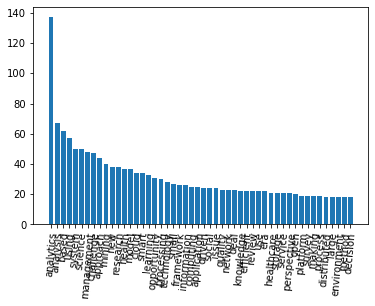

In [12]:
sorted_Keys = sorted(word_count,key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)),list(sorted_Keys),rotation='85')
plt.show()

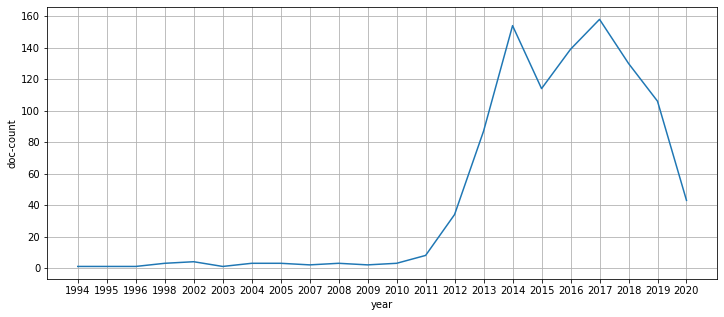

In [13]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

In [14]:
summary_year

,출판일,doc_count
0,1994,1
1,1995,1
2,1996,1
3,1998,3
4,2002,4
5,2003,1
6,2004,3
7,2005,3
8,2007,2
9,2008,3


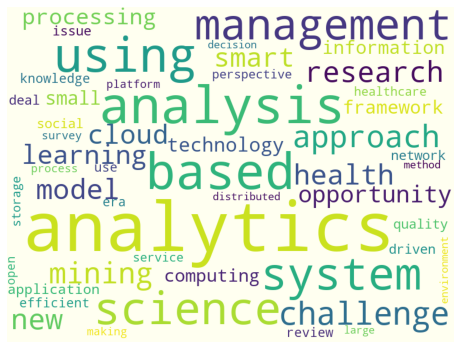

In [83]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords=stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()